In [1]:
import pandas as pd
import numpy as np
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=ACFC-L-DANGNIKE\SQLEXPRESS;'
    'Database=NIKE;'
    'Trusted_Connection=yes;')

### Load history sales data

In [3]:
sale = pd.read_sql_query(
    """SELECT
        STORE_CODE,
        MONTH(CREATED_DATE) MONTH,
        YEAR(CREATED_DATE) YEAR,
        SUM(EXT_AMT_TOTAL) AMT
    FROM SALES_DATA
    WHERE STORE_CODE IN (SELECT DISTINCT STORE_CODE FROM SALES_DATA WHERE YEAR(CREATED_DATE)=2023 AND STORE_CODE LIKE '3%')
    GROUP BY STORE_CODE,
        MONTH(CREATED_DATE),
        YEAR(CREATED_DATE)""",
    conn)
sale.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,STORE_CODE,MONTH,YEAR,AMT
0,344,7,2018,7.554518e+08
1,373,1,2021,6.942217e+08
2,350,4,2021,1.707233e+09
3,356,9,2022,1.065039e+09
4,322,3,2015,4.610052e+08


In [34]:
t2 = sale[['YEAR','AMT']]

for i in sale.MONTH.unique():
    t2[i] = np.where(sale.MONTH == i, 1, 0)



C:\Users\TranPhuongHaiDang(St\AppData\Local\Temp\ipykernel_15104\3946628038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2[i] = np.where(sale.MONTH == i, 1, 0)


In [35]:
for j in sale.STORE_CODE.unique():
    t2[j] = np.where(sale.STORE_CODE == j, 1, 0)
t2

,YEAR,AMT,7,1,4,9,3,12,2,6,...,346,378,330,361,368,369,377,376,375,371
0,2018,7.554518e+08,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,6.942217e+08,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,1.707233e+09,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,1.065039e+09,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,4.610052e+08,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,2019,9.708966e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2882,2018,7.290819e+08,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2883,2020,1.069811e+09,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2884,2021,4.790415e+08,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x=t2.drop('AMT', axis=1)
x['one']=1
y=t2.AMT

In [55]:
x

,YEAR,7,1,4,9,3,12,2,6,11,...,378,330,361,368,369,377,376,375,371,one
0,2018,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2021,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2021,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2022,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2015,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,2019,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2882,2018,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2883,2020,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2884,2021,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
y

0       7.554518e+08
1       6.942217e+08
2       1.707233e+09
3       1.065039e+09
4       4.610052e+08
            ...     
2881    9.708966e+08
2882    7.290819e+08
2883    1.069811e+09
2884    4.790415e+08
2885    1.068716e+09
Name: AMT, Length: 2886, dtype: float64

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
sklearn_linear_regression = LinearRegression(fit_intercept=False)
sklearn_linear_regression.fit(x, y)
sklearn_linear_regression.score(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7202247614768951

In [59]:
sklearn_linear_regression.predict(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([1.76729915e+09, 1.03745952e+09, 1.82303174e+09, ...,
       1.35237952e+09, 6.24945888e+08, 1.52267802e+09])

In [60]:
store = pd.DataFrame({'STORE_CODE' : sale.STORE_CODE.unique().tolist()})
month = pd.DataFrame({'MONTH' : sale.MONTH.unique().tolist()})
year = pd.DataFrame({'YEAR' : [2020,2021,2022,2023]})

store['key']=1
month['key']=1
year['key']=1

tbl= pd.merge(
    pd.merge(year,month, on = 'key'),
    store,
    on = 'key').drop('key', axis=1)
tbl

,YEAR,MONTH,STORE_CODE
0,2020,7,344
1,2020,7,373
2,2020,7,350
3,2020,7,356
4,2020,7,322
...,...,...,...
2107,2023,8,369
2108,2023,8,377
2109,2023,8,376
2110,2023,8,375


In [61]:
for i in tbl.MONTH.unique():
    tbl[i]= np.where(tbl.MONTH == i, 1, 0)


In [62]:
for j in tbl.STORE_CODE.unique():
    tbl[j] = np.where(tbl.STORE_CODE == j, 1, 0)
tbl

,YEAR,MONTH,STORE_CODE,7,1,4,9,3,12,2,...,346,378,330,361,368,369,377,376,375,371
0,2020,7,344,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,7,373,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,7,350,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,7,356,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,7,322,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2023,8,369,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2108,2023,8,377,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2109,2023,8,376,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2110,2023,8,375,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
x_pred = tbl.drop(['MONTH','STORE_CODE'], axis=1)
x_pred['one']=1
y_pred=sklearn_linear_regression.predict(x_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [64]:
tbl

,YEAR,MONTH,STORE_CODE,7,1,4,9,3,12,2,...,346,378,330,361,368,369,377,376,375,371
0,2020,7,344,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,7,373,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,7,350,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,7,356,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,7,322,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2023,8,369,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2108,2023,8,377,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2109,2023,8,376,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2110,2023,8,375,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
final = pd.merge(
    tbl,
    sale,
    on = ['STORE_CODE','MONTH','YEAR'],
    how = 'left')
final

,YEAR,MONTH,STORE_CODE,7,1,4,9,3,12,2,...,378,330,361,368,369,377,376,375,371,AMT
0,2020,7,344,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.210401e+09
1,2020,7,373,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.586464e+08
2,2020,7,350,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.369146e+09
3,2020,7,356,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.399148e+08
4,2020,7,322,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.686154e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2023,8,369,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,NaN
2108,2023,8,377,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,NaN
2109,2023,8,376,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
2110,2023,8,375,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN


In [66]:
final['AMT_Pred']=y_pred
final

,YEAR,MONTH,STORE_CODE,7,1,4,9,3,12,2,...,330,361,368,369,377,376,375,371,AMT,AMT_Pred
0,2020,7,344,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.210401e+09,1.933551e+09
1,2020,7,373,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.586464e+08,5.171880e+08
2,2020,7,350,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.369146e+09,1.855581e+09
3,2020,7,356,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7.399148e+08,7.858611e+08
4,2020,7,322,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.686154e+08,7.535628e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,2023,8,369,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,NaN,1.204163e+09
2108,2023,8,377,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,NaN,1.103582e+09
2109,2023,8,376,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,2.517306e+08
2110,2023,8,375,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,NaN,4.289392e+08


In [67]:
gr = final.groupby(['YEAR','MONTH'], as_index=False).agg({'AMT':'sum','AMT_Pred':'sum'})
gr

,YEAR,MONTH,AMT,AMT_Pred
0,2020,1,6.299504e+10,7.117655e+10
1,2020,2,3.683924e+10,3.377809e+10
2,2020,3,2.436282e+10,4.516744e+10
3,2020,4,1.400371e+10,4.685245e+10
4,2020,5,4.762979e+10,4.632641e+10
5,2020,6,7.040194e+10,5.973848e+10
6,2020,7,5.383733e+10,5.194214e+10
7,2020,8,3.842843e+10,4.797900e+10
8,2020,9,5.615934e+10,4.609420e+10
9,2020,10,6.301877e+10,5.023729e+10


In [68]:
gr['Y_M']= gr.YEAR*100 + gr.MONTH
gr

,YEAR,MONTH,AMT,AMT_Pred,Y_M
0,2020,1,6.299504e+10,7.117655e+10,202001
1,2020,2,3.683924e+10,3.377809e+10,202002
2,2020,3,2.436282e+10,4.516744e+10,202003
3,2020,4,1.400371e+10,4.685245e+10,202004
4,2020,5,4.762979e+10,4.632641e+10,202005
5,2020,6,7.040194e+10,5.973848e+10,202006
6,2020,7,5.383733e+10,5.194214e+10,202007
7,2020,8,3.842843e+10,4.797900e+10,202008
8,2020,9,5.615934e+10,4.609420e+10,202009
9,2020,10,6.301877e+10,5.023729e+10,202010


<AxesSubplot:xlabel='Y_M', ylabel='AMT'>

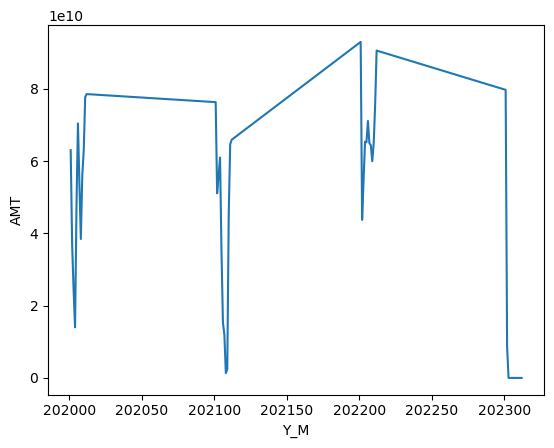

In [69]:
sns.lineplot(data=gr, x='Y_M', y='AMT')

In [70]:
pd.melt(gr[['AMT','AMT_Pred','Y_M']], ['Y_M'])

,Y_M,variable,value
0,202001,AMT,6.299504e+10
1,202002,AMT,3.683924e+10
2,202003,AMT,2.436282e+10
3,202004,AMT,1.400371e+10
4,202005,AMT,4.762979e+10
...,...,...,...
91,202308,AMT_Pred,5.895163e+10
92,202309,AMT_Pred,5.706682e+10
93,202310,AMT_Pred,6.120991e+10
94,202311,AMT_Pred,7.660060e+10


<Figure size 2000x800 with 0 Axes>

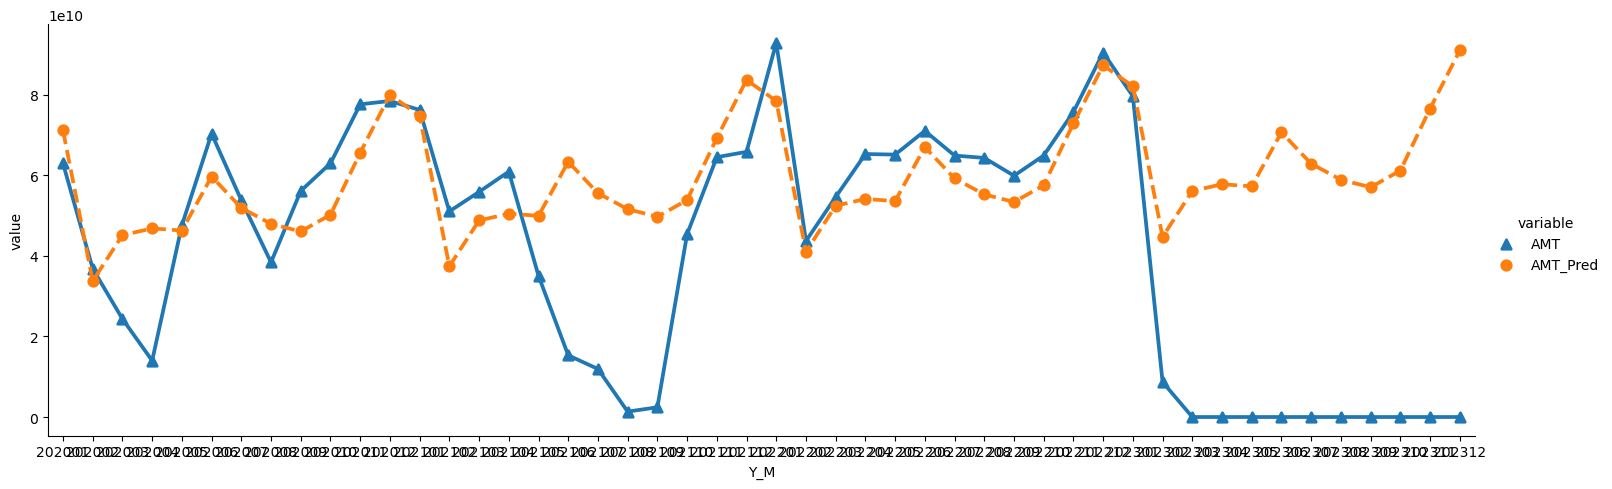

In [79]:
plt.figure(figsize=(20, 8))
sns.catplot(
    data=pd.melt(gr[['AMT','AMT_Pred','Y_M']], ['Y_M']), 
    x='Y_M', 
    y="value", 
    hue="variable",
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point",
    height=5, 
    aspect=3
)
plt.show()

In [80]:
store = pd.read_sql_query(
    "select * from master_store",
    conn)
store

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,STORE CODE,TIER,CHANNEL,LEVEL,LEVEL 2,STORE_NAME,SHORT NAME,AREA,CITY,ADDRESS1,ADDRESS2,LOCATION_TYPE,GROSS_AREA,NET_AREA
0,000,WH,EVENT,WH,WH,TAN HONG WH,TNHG,NORTH,TNHG,None,None,None,NaN,NaN
1,001,WH,EVENT,WH,WH,KHO HOP QUI,ICD,SOUTH,ICD,None,None,None,NaN,NaN
2,002,WH,EVENT,WH,WH,Song Than WH-Temp,ICD,SOUTH,ICD,None,None,None,NaN,NaN
3,003,WH,EVENT,WH,WH,Song Than WH,ICD,SOUTH,ICD,None,None,None,NaN,NaN
4,004,WH,EVENT,WH,WH,TAN HONG WH TEMP,TNHG,SOUTH,TNHG,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,995,EVENT,MARKDOWN,OUTLET,OUTLET,NIKE SUPERBOWL,None,SOUTH,HCM,None,None,None,NaN,NaN
82,996,WS,EVENT,WS,WS,WholeSale,WS,WS,WS,None,None,None,NaN,NaN
83,997,EVENT,EVENT,EVENT,EVENT,Private Sale,None,SOUTH,HCM,None,None,None,NaN,NaN
84,998,OFFICE,EVENT,WS,WS,OFFICE,OFFICE,SOUTH,HCM,None,None,None,NaN,NaN


### let's try with store info

In [139]:
t=pd.merge(
    sale,
    store[['STORE CODE','LEVEL','CITY','ADDRESS2','LOCATION_TYPE','GROSS_AREA']],
    left_on= 'STORE_CODE',
    right_on='STORE CODE',
    how='left')
t

,STORE_CODE,MONTH,YEAR,AMT,STORE CODE,LEVEL,CITY,ADDRESS2,LOCATION_TYPE,GROSS_AREA
0,344,7,2018,7.554518e+08,344,NSP BST,HCM,Bình Thạnh,SHOPPING MALL,1883.0
1,373,1,2021,6.942217e+08,373,NSP BTR,HA NOI,Hai Bà Trưng,SHOPPING MALL,1646.0
2,350,4,2021,1.707233e+09,350,NSP BTR,HCM,Bình Tân,SHOPPING MALL,2162.0
3,356,9,2022,1.065039e+09,356,NSP BTR,HCM,Quận 2,SHOPPING MALL,1431.0
4,322,3,2015,4.610052e+08,322,NSP BTR,HCM,Quận 3,STREETFONT,1581.0
...,...,...,...,...,...,...,...,...,...,...
2881,368,10,2019,9.708966e+08,368,NSP BTR,HA NOI,Thanh Xuân,SHOPPING MALL,1796.0
2882,304,3,2018,7.290819e+08,304,DS,HCM,Quận 1,SHOPPING MALL,1183.0
2883,345,1,2020,1.069811e+09,345,DS,HA NOI,Ba Đình,SHOPPING MALL,1538.0
2884,334,3,2021,4.790415e+08,334,DS,CAN THO,Ninh Kieu,SHOPPING MALL,1258.0


In [140]:
t.columns

Index(['STORE_CODE', 'MONTH', 'YEAR', 'AMT', 'STORE CODE', 'LEVEL', 'CITY',
       'ADDRESS2', 'LOCATION_TYPE', 'GROSS_AREA'],
      dtype='object')

In [141]:
col=['MONTH', 'STORE_CODE', 'CITY','LOCATION_TYPE']

for i in col:
    for j in t[i].unique():
        t[j] = np.where( t[i] == j, 1, 0)

t

,STORE_CODE,MONTH,YEAR,AMT,STORE CODE,LEVEL,CITY,ADDRESS2,LOCATION_TYPE,GROSS_AREA,...,HA NOI,DA NANG,HAI PHONG,BINH DUONG,NHA TRANG,CAN THO,QUANG NINH,SHOPPING MALL,STREETFONT,AIRPORT
0,344,7,2018,7.554518e+08,344,NSP BST,HCM,Bình Thạnh,SHOPPING MALL,1883.0,...,0,0,0,0,0,0,0,1,0,0
1,373,1,2021,6.942217e+08,373,NSP BTR,HA NOI,Hai Bà Trưng,SHOPPING MALL,1646.0,...,1,0,0,0,0,0,0,1,0,0
2,350,4,2021,1.707233e+09,350,NSP BTR,HCM,Bình Tân,SHOPPING MALL,2162.0,...,0,0,0,0,0,0,0,1,0,0
3,356,9,2022,1.065039e+09,356,NSP BTR,HCM,Quận 2,SHOPPING MALL,1431.0,...,0,0,0,0,0,0,0,1,0,0
4,322,3,2015,4.610052e+08,322,NSP BTR,HCM,Quận 3,STREETFONT,1581.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,368,10,2019,9.708966e+08,368,NSP BTR,HA NOI,Thanh Xuân,SHOPPING MALL,1796.0,...,1,0,0,0,0,0,0,1,0,0
2882,304,3,2018,7.290819e+08,304,DS,HCM,Quận 1,SHOPPING MALL,1183.0,...,0,0,0,0,0,0,0,1,0,0
2883,345,1,2020,1.069811e+09,345,DS,HA NOI,Ba Đình,SHOPPING MALL,1538.0,...,1,0,0,0,0,0,0,1,0,0
2884,334,3,2021,4.790415e+08,334,DS,CAN THO,Ninh Kieu,SHOPPING MALL,1258.0,...,0,0,0,0,0,1,0,1,0,0


In [142]:
x= t.drop(['STORE_CODE', 'MONTH', 'STORE CODE', 'LEVEL', 'CITY',
       'ADDRESS2', 'LOCATION_TYPE','AMT','YEAR','GROSS_AREA'], axis=1)

x['YEAR'] = (t.YEAR - t.YEAR.min())/(t.YEAR.max()-t.YEAR.min())
x['GROSS_AREA']=  (t.GROSS_AREA - t.GROSS_AREA.min())/(t.GROSS_AREA.max()-t.GROSS_AREA.min())
x['ONE'] = 1
x

,7,1,4,9,3,12,2,6,11,5,...,BINH DUONG,NHA TRANG,CAN THO,QUANG NINH,SHOPPING MALL,STREETFONT,AIRPORT,YEAR,GROSS_AREA,ONE
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.375,0.297038,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.750,0.228223,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.750,0.378049,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.875,0.165796,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0.000,0.209350,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.500,0.271777,1
2882,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.375,0.093786,1
2883,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.625,0.196864,1
2884,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0.750,0.115563,1


In [143]:
y=t['AMT']
y

0       7.554518e+08
1       6.942217e+08
2       1.707233e+09
3       1.065039e+09
4       4.610052e+08
            ...     
2881    9.708966e+08
2882    7.290819e+08
2883    1.069811e+09
2884    4.790415e+08
2885    1.068716e+09
Name: AMT, Length: 2886, dtype: float64

In [144]:
sklearn_linear_regression = LinearRegression(fit_intercept=False)
sklearn_linear_regression.fit(x, y)
sklearn_linear_regression.score(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int64', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.7202204923465418

In [2]:
from sklearn.metrics import classification_report
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy

ModuleNotFoundError: No module named 'tensorflow'